In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
data=pd.read_csv('customer_history.csv',sep=';')

In [3]:
data.shape

(1499, 12)

In [4]:
data.head()

,id,user_id,customer_id,price,service_price,product_price,note_text,date,status,created,modified,note_image
0,1,13.0,1.0,NaN,"[{""service"":""Nails"",""price"":""20.1""},{""service""...",NaN,test data only,1987-09-10,1,1533294899,1533294899,NaN
1,2,13.0,1.0,NaN,"[{""service"":""Nails"",""price"":""20.1""},{""service""...",NaN,test data only,1987-09-10,1,1533295093,1533295093,NaN
2,4,13.0,1.0,NaN,"[{""service"":""Nails"",""price"":""20.1""},{""service""...",NaN,test data only,1987-09-10,1,1533365639,1533365639,NaN
3,10,33.0,126.0,NaN,"[{""service"":""\u30a2\u30a4\u30e9\u30c3\u30b7\u3...",NaN,Testing Note,2018-08-05,1,1533707849,1539067124,file_15344868560.jpg
4,7,102.0,127.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""5000...",NaN,Hfkdmdnd,2018-08-06,1,1533520516,1533520516,file_15335205050.jpg


In [5]:
user_102=data[data['user_id']==102.0]

In [6]:
user_102=user_102.reset_index()
del user_102['index']
user_102.head()

,id,user_id,customer_id,price,service_price,product_price,note_text,date,status,created,modified,note_image
0,7,102.0,127.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""5000...",NaN,Hfkdmdnd,2018-08-06,1,1533520516,1533520516,file_15335205050.jpg
1,118,102.0,259.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""756\...",NaN,グリーンネイルの爪を長さだし、アート,2018-09-05,1,1536111670,1536111670,NaN
2,119,102.0,289.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""6,80...",NaN,ウエディングネイル\n普段はあまりネイルしない\n大阪に引っ越す,2018-09-05,1,1536120590,1536120590,NaN
3,120,102.0,290.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""6,80...",NaN,仕事休みできた。有給たくさんある。,2018-09-05,1,1536126285,1536126285,NaN
4,121,102.0,291.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""11,8...",NaN,Hey!Say!JUMPがすき\nライブ行く\n青が好き\n,2018-09-05,1,1536134522,1536134522,NaN


In [356]:
grouped=user_102.groupby(user_102['customer_id'])

In [357]:
# user_102.groupby(user_102['customer_id']).groups

In [358]:
user_102.shape

(1239, 14)

In [359]:
user_102.dtypes

id                        int64
user_id                 float64
customer_id             float64
price                   float64
service_price            object
product_price            object
note_text                object
date             datetime64[ns]
status                    int64
created                   int64
modified                  int64
note_image               object
Month                     int64
Year                      int64
dtype: object

In [360]:
a=user_102['date'][0]

In [361]:
user_102['date']=pd.to_datetime(user_102['date'])

In [362]:
user_102['Month']=user_102['date'].apply(lambda x:x.month)

In [363]:
user_102['Year']=user_102['date'].apply(lambda x:x.year)

In [364]:
user_102['day']

,id,user_id,customer_id,price,service_price,product_price,note_text,date,status,created,modified,note_image,Month,Year
0,7,102.0,127.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""5000...",NaN,Hfkdmdnd,2018-08-06,1,1533520516,1533520516,file_15335205050.jpg,8,2018
1,118,102.0,259.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""756\...",NaN,グリーンネイルの爪を長さだし、アート,2018-09-05,1,1536111670,1536111670,NaN,9,2018
2,119,102.0,289.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""6,80...",NaN,ウエディングネイル\n普段はあまりネイルしない\n大阪に引っ越す,2018-09-05,1,1536120590,1536120590,NaN,9,2018
3,120,102.0,290.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""6,80...",NaN,仕事休みできた。有給たくさんある。,2018-09-05,1,1536126285,1536126285,NaN,9,2018
4,121,102.0,291.0,NaN,"[{""service"":""\u30cd\u30a4\u30eb"",""price"":""11,8...",NaN,Hey!Say!JUMPがすき\nライブ行く\n青が好き\n,2018-09-05,1,1536134522,1536134522,NaN,9,2018


In [365]:
user_102.isnull().sum()
# Here, there are 6 rows which have missing values,so I am dropping it because without date there is no significance of it

id                  0
user_id             0
customer_id         0
price            1239
service_price     876
product_price    1239
note_text         566
date                0
status              0
created             0
modified            0
note_image       1227
Month               0
Year                0
dtype: int64

In [366]:
user_102['date'].isnull().sum()

0

In [367]:
user_102=user_102.dropna(subset=['date'])

In [368]:
user_102.isnull().sum()

id                  0
user_id             0
customer_id         0
price            1239
service_price     876
product_price    1239
note_text         566
date                0
status              0
created             0
modified            0
note_image       1227
Month               0
Year                0
dtype: int64

In [369]:
user_102.Month=user_102.Month.apply(lambda x: int(x))
user_102.Year=user_102.Year.apply(lambda x: int(x))

In [370]:
g = user_102[['customer_id','Month','Year']].groupby(['Month','Year']).agg('count')

In [371]:
g=pd.DataFrame(g)

In [372]:
g.columns=['Total_visits']

In [373]:
g=g.sort_values('Year')

In [375]:
 g=g.reset_index()

In [376]:
g #here is the total visits of the customers per month.

,Month,Year,Total_visits
0,7,2018,3
1,8,2018,64
2,9,2018,136
3,10,2018,163
4,11,2018,197
5,12,2018,217
6,1,2019,167
7,2,2019,194
8,3,2019,98


In [377]:
import matplotlib.pyplot as plt

In [379]:
g['Month']=g['Month'].apply(lambda x : datetime.date(1900,x, 1).strftime('%B'))

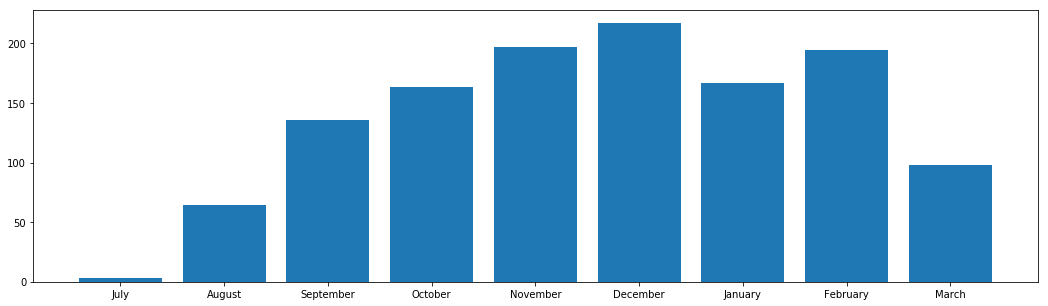

In [381]:
f, ax = plt.subplots(figsize=(18,5))
barlist=plt.bar(g['Month'],g['Total_visits'])

In [386]:
customer_wise_data=user_102.groupby(['Month','Year']).agg('count')['date']

In [387]:
customer_wise_data=pd.DataFrame(customer_wise_data)

In [392]:
customer_wise_data=customer_wise_data.sort_values('Year')
customer_wise_data

,,date
Month,Year,
7,2018,3
8,2018,64
9,2018,136
10,2018,163
11,2018,197
12,2018,217
1,2019,167
2,2019,194
3,2019,98


In [393]:
train=customer_wise_data[:7]
test=customer_wise_data[7:]

## Giving Time series prediction using ARIMA model

In [423]:
from statsmodels.tsa.arima_model import ARIMA

## Fitting line over training data

In [538]:
model=ARIMA(train,order=(0,0,1))

/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [539]:
model_fit = model.fit()

In [540]:
predictions = model_fit.predict(start=len(train), end=len(train)+1)
print(predictions)

7    122.893261
8    125.749769
dtype: float64


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## Now fitting entire data on ARIMA model.

In [542]:
model=ARIMA(customer_wise_data,order=(0,0,1))
model_fit = model.fit()

/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [523]:
model=ARIMA(customer_wise_data,order=(1,0,0))

/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [524]:
model_fit = model.fit()

In [550]:
predictions = model_fit.predict(start=len(customer_wise_data), end=len(customer_wise_data)+2)
print("Prediction for three Months------------\n",round(predictions))

Prediction for three Months------------
 9      84.0
10    127.0
11    127.0
dtype: float64


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
